In [ ]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import xlsxwriter
import yfinance as yf

In [ ]:
# Definir el ticker y el período de tiempo
ticker = "AAPL"  # Cambia por el activo que desees analizar
data = yf.download(ticker, start="2023-01-01", end="2025-03-07", interval="1d")  # Últimos 3 meses, velas diarias

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Convertir el índice a datetime si no lo está
data.index = pd.to_datetime(data.index)

# Asegurar que los valores sean numéricos (puede haber NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Mostrar información general del DataFrame
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545 entries, 2023-01-03 to 2025-03-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   545 non-null    float64
 1   (High, AAPL)    545 non-null    float64
 2   (Low, AAPL)     545 non-null    float64
 3   (Open, AAPL)    545 non-null    float64
 4   (Volume, AAPL)  545 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 25.5 KB
None
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500
2023-01-04  124.907715  127.181283  123.642427  125.431622   89113600
2023-01-05  123.583107  126.301500  123.326101  125.668857   80962700
2023-01-06  128.130234  128.792531  123.454601  124.561732   87754700
2023-01-09  128.

In [ ]:
data.columns=[ 'Open', 'High', 'Low', 'Close', 'Volume']

data

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500
2023-01-04,124.907715,127.181283,123.642427,125.431622,89113600
2023-01-05,123.583107,126.301500,123.326101,125.668857,80962700
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
2023-01-09,128.654144,131.876686,128.397138,128.970474,70790800
...,...,...,...,...,...
2025-02-28,241.839996,242.089996,230.199997,236.949997,56833400
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100


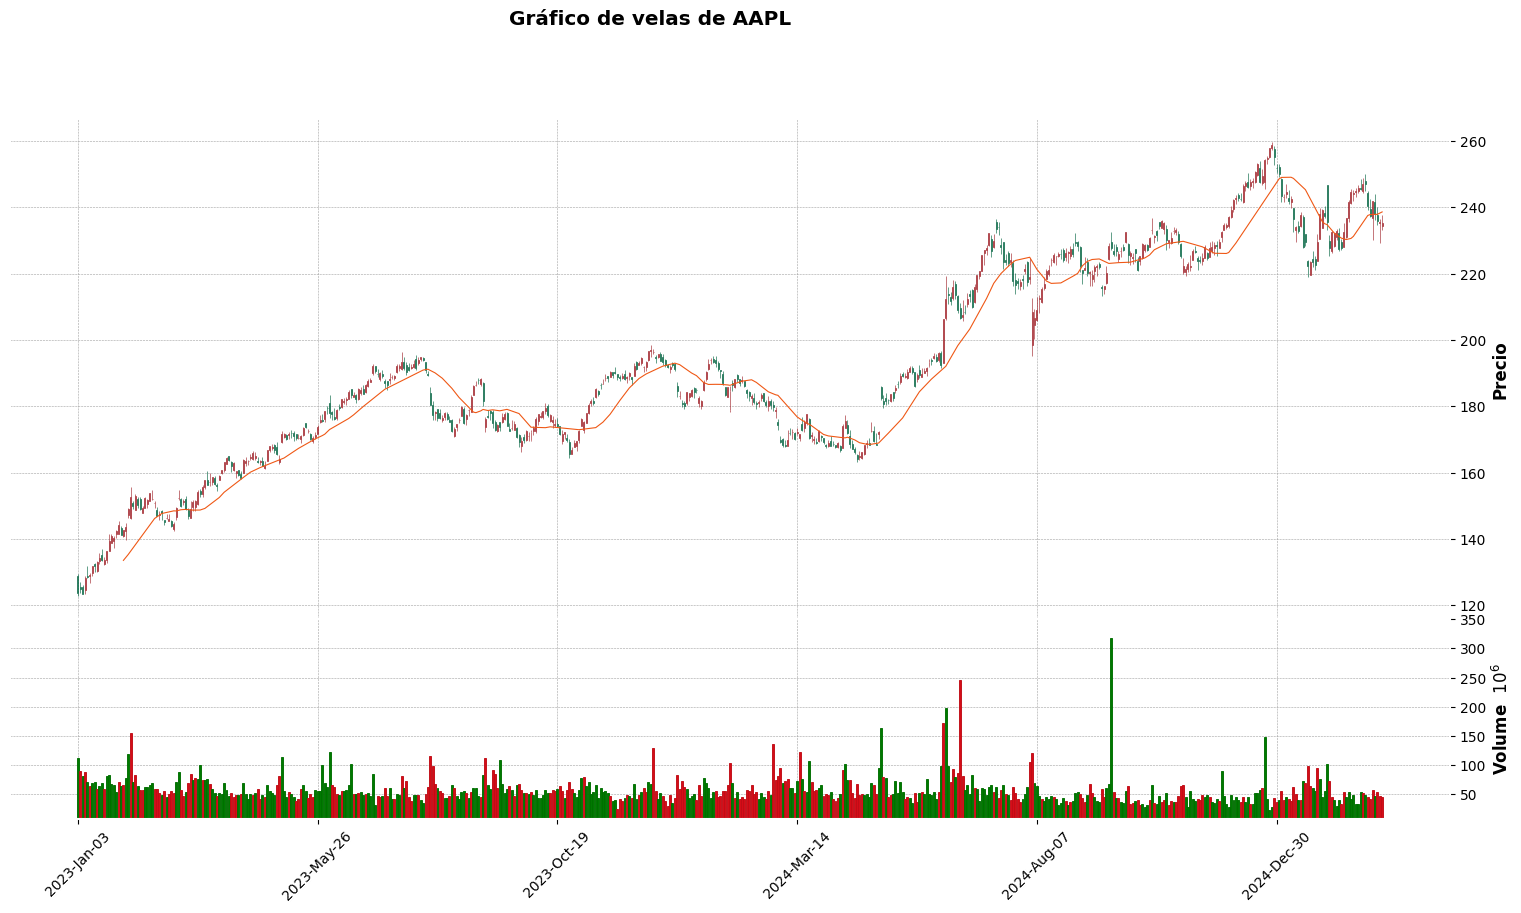

In [ ]:
# Configurar el gráfico de velas con la media móvil
mpf.plot(data, type='candle', style='charles',
         title=f'Gráfico de velas de {ticker}',
         ylabel='Precio',
         mav=(20,),  # Agrega la media móvil de 20 periodos
         volume=True,
         figsize=(20, 10))

In [ ]:
#Creamos columnas de retorno y etiquetamos jornadas alcistas y jormadas bajistas
data["daily_return"] = data["Close"].pct_change()
data["state"] = np.where(data["daily_return"] >= 0, "up", "down")


<Axes: xlabel='Date'>

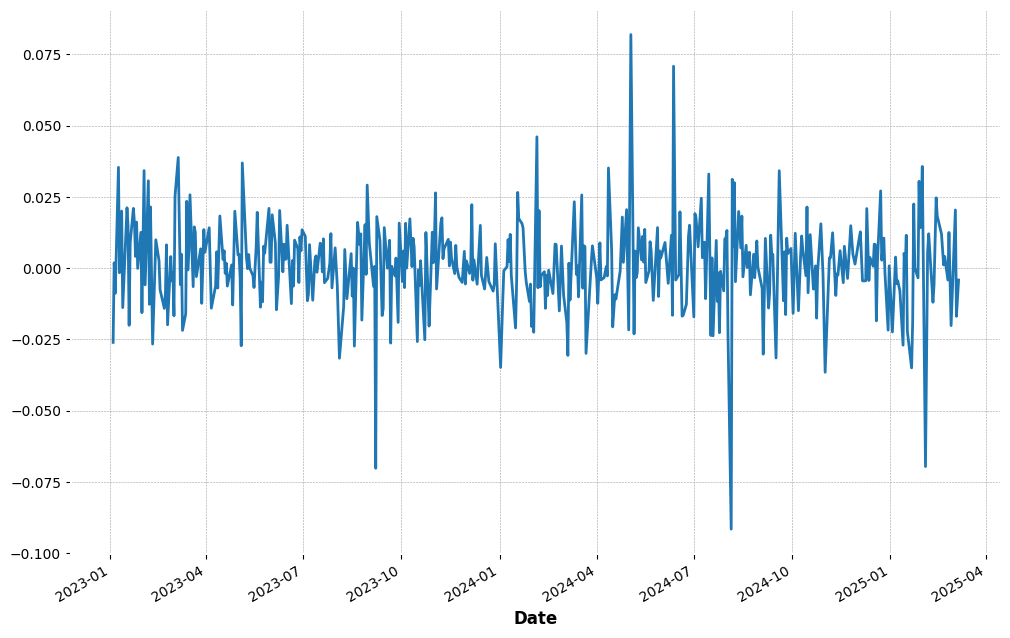

In [ ]:
data['daily_return'].plot(figsize=(12, 8))

In [ ]:
#Conteo de probabilidades 'up y 'down'
up_counts = len(data[data["state"] == "up"])
down_counts = len(data[data["state"] == "down"])
up_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1) == "up") ]) / len(data.query('state=="up"'))
down_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1) == "down")]) / len(data.query('state=="up"'))
up_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1) == "up")]) / len(data.query('state=="down"'))
down_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1) == "down")]) / len(data.query('state=="down"'))
transition_matrix = pd.DataFrame({
    "up": [up_to_up, up_to_down],
    "down": [down_to_up, down_to_down]
}, index=["up", "down"])

print(transition_matrix)

            up      down
up    0.565657  0.434343
down  0.520161  0.475806


In [ ]:
data['9-day'] = data['Close'].rolling(9).mean()
data['21-day'] = data['Close'].rolling(21).mean()
data[0:25]

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day
Date,,,,,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500,NaN,down,NaN,NaN
2023-01-04,124.907715,127.181283,123.642427,125.431622,89113600,-0.026021,down,NaN,NaN
2023-01-05,123.583107,126.301500,123.326101,125.668857,80962700,0.001891,up,NaN,NaN
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700,-0.008810,down,NaN,NaN
2023-01-09,128.654144,131.876686,128.397138,128.970474,70790800,0.035394,up,NaN,NaN
2023-01-10,129.227448,129.751355,126.647445,128.762848,63896200,-0.001610,down,NaN,NaN
2023-01-11,131.955780,131.975539,128.960606,129.741519,69458900,0.007601,up,NaN,NaN
2023-01-12,131.876694,132.716915,129.929334,132.341293,71379600,0.020038,up,NaN,NaN
2023-01-13,133.211166,133.369331,130.146804,130.512547,57809700,-0.013818,down,128.308170,NaN


In [ ]:
data['signal'] = np.where(data['9-day'] > data['21-day'], 1, 0)
data['signal'] = np.where(data['9-day'] < data['21-day'], -1, data['signal'])


data['Markov_Signal'] = 0

state = 0

for i in range(1, len(data)):
    if data['daily_return'].iloc[i] < 0 and data['daily_return'].iloc[i-1] < 0:  # dos días consecutivos negativos
        state = -1
    elif data['daily_return'].iloc[i] > 0 and data['daily_return'].iloc[i-1] > 0:  # dos días consecutivos positivos
        state = 1

    data['Markov_Signal'].iloc[i] = state


data.dropna(inplace=True)
data.head(15)

Se han truncado las últimas 5000 líneas del flujo de salida.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Markov_Signal'].iloc[i] = state
<ipython-input-12-b15de629c802>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Markov_Signal'].iloc[i] = state
<ipython-input-12-b15de629c802>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exam

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day,signal,Markov_Signal
Date,,,,,,,,,,,
2023-02-01,143.758514,144.924960,139.695767,142.315303,77663600,0.008900,up,139.770452,133.989257,1,1
2023-02-02,149.086563,149.442411,146.467012,147.188617,118339000,0.034243,up,141.266389,134.865732,1,1
2023-02-03,152.724289,155.571193,146.130951,146.328649,154357300,-0.005843,down,142.354846,135.860828,1,1
2023-02-06,149.986099,151.340364,149.047021,150.816456,69858300,0.030669,up,143.701411,137.058333,1,1
2023-02-07,152.872559,153.445894,148.908652,148.908652,83322600,-0.012650,down,144.772293,138.217710,1,1
2023-02-08,150.173920,152.803351,149.432540,152.111399,64120100,0.021508,up,145.948614,139.319659,1,1
2023-02-09,149.136002,152.556241,148.691177,152.012560,56007100,-0.000650,down,147.115051,140.426788,1,1
2023-02-10,149.502304,149.829011,147.730182,147.967791,57450700,-0.026608,down,147.634370,141.294706,1,-1
2023-02-13,152.313950,152.719845,149.413195,149.442894,62199000,0.009969,up,148.565814,142.109068,1,-1


In [ ]:
data['log_return'] = np.log(data['Close']).diff()
data['system_return'] = data['signal'] * data['log_return']
data['Markov_Return'] = data['Markov_Signal'] * data['log_return']
data.loc[data.index[0], 'Markov_Return'] = 0
data.loc[data.index[0], 'system_return'] = 0
data.loc[data.index[0], 'log_return'] = 0

data['entry'] = data.signal.diff()
data['Markov_Entry'] = data.Markov_Signal.diff()
data.dropna(inplace=True)
data = data.drop(data[data['Markov_Entry'] == 1].index)
data.Markov_Entry.value_counts()

,count
Markov_Entry,
0.0,441
-2.0,42
2.0,41


In [ ]:
data['entry'].value_counts()

,count
entry,
0.0,502
-2.0,11
2.0,11


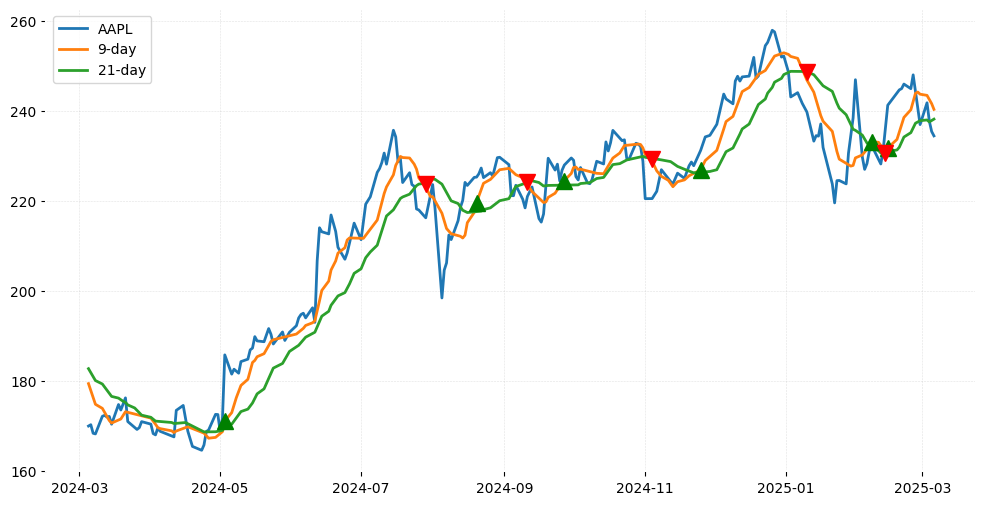

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data.iloc[-252:]['Close'], label = 'AAPL')
plt.plot(data.iloc[-252:]['9-day'], label = '9-day')
plt.plot(data.iloc[-252:]['21-day'], label = '21-day')
plt.plot(data[-252:].loc[data.entry == 2].index, data[-252:]['9-day'][data.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(data[-252:].loc[data.entry == -2].index, data[-252:]['21-day'][data.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

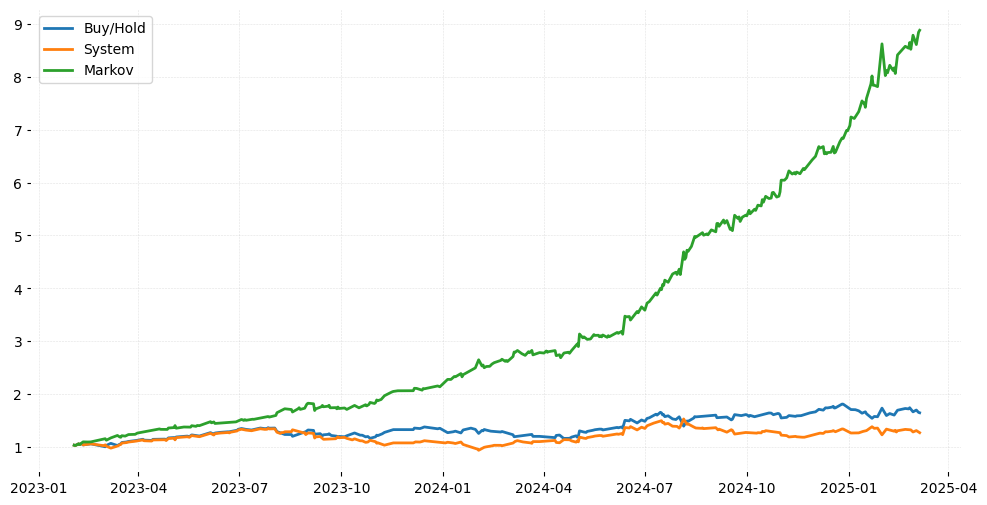

In [ ]:
plt.plot(np.exp(data['log_return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(data['system_return']).cumprod(), label='System')
plt.plot(np.exp(data['Markov_Return']).cumprod(), label='Markov')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [ ]:
data

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day,signal,Markov_Signal,log_return,system_return,Markov_Return,entry,Markov_Entry
Date,,,,,,,,,,,,,,,,
2023-02-02,149.086563,149.442411,146.467012,147.188617,118339000,0.034243,up,141.266389,134.865732,1,1,0.033670,0.033670,0.033670,0.0,0.0
2023-02-03,152.724289,155.571193,146.130951,146.328649,154357300,-0.005843,down,142.354846,135.860828,1,1,-0.005860,-0.005860,-0.005860,0.0,0.0
2023-02-06,149.986099,151.340364,149.047021,150.816456,69858300,0.030669,up,143.701411,137.058333,1,1,0.030208,0.030208,0.030208,0.0,0.0
2023-02-07,152.872559,153.445894,148.908652,148.908652,83322600,-0.012650,down,144.772293,138.217710,1,1,-0.012731,-0.012731,-0.012731,0.0,0.0
2023-02-08,150.173920,152.803351,149.432540,152.111399,64120100,0.021508,up,145.948614,139.319659,1,1,0.021280,0.021280,0.021280,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,241.839996,242.089996,230.199997,236.949997,56833400,-0.010275,down,243.702221,237.817799,1,-1,-0.010328,-0.010328,0.010328,0.0,0.0
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000,0.020426,up,243.439999,237.978852,1,-1,0.020220,0.020220,-0.020220,0.0,0.0
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100,-0.016874,down,242.667777,237.540351,1,-1,-0.017018,-0.017018,0.017018,0.0,0.0


In [ ]:
data[((data['Markov_Entry'] == -2) & (data['Markov_Entry'].shift(-1) == -2))]

,Open,High,Low,Close,Volume,daily_return,state,9-day,21-day,signal,Markov_Signal,log_return,system_return,Markov_Return,entry,Markov_Entry
Date,,,,,,,,,,,,,,,,
